# **Pedido 1**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="EOQ_area_max")
data

,articulo.1,articulo.2,articulo.3,D1,D2,D3,K1,K2,K3,h1,h2,h3,a1,a2,a3,A,pedido_1,pedido_2,pedido_3,area_total
0,1,2,3,2,4,4,10,5,15,0.3,0.1,0.2,1,1,1,25,6.34,7.09,11.57,24.999
1,1,2,3,3,2,9,11,16,9,0.4,0.7,0.7,5,4,3,65,4.45,4.59,8.12,64.956
2,1,2,3,3,3,4,16,7,18,0.7,0.7,0.2,3,4,1,46,6.10,3.62,13.20,45.993
3,1,2,3,9,10,3,8,19,7,0.4,0.6,0.4,5,5,5,72,4.58,7.34,2.47,71.962
4,1,2,3,8,4,7,17,13,16,0.3,0.2,0.3,4,2,4,74,7.90,6.83,7.17,73.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2,3,4,9,4,15,18,16,0.3,0.5,0.5,2,4,2,50,5.75,6.73,5.78,49.983
96,1,2,3,6,4,7,7,14,15,0.7,0.7,0.3,2,2,3,25,3.01,3.48,4.00,24.995
97,1,2,3,9,8,4,5,18,18,0.1,0.5,0.4,4,2,5,43,2.98,7.22,3.33,42.987
98,1,2,3,8,2,9,17,12,8,0.8,0.7,0.1,4,2,4,26,3.20,1.88,2.36,26.000


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D1",	"D2",	"D3",	"K1",	"K2",	"K3",	"h1",	"h2", "h3",	"a1",	"a2",	"a3",	"A"]])
targets = np.asarray(data["pedido_1"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

1.7149999999999999

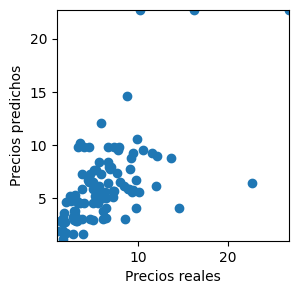

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(1,targets.max())
plt.ylim(1,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[ 3. ,  2. ,  9. , 11. , 16. ,  9. ,  0.4,  0.7,  0.7,  5. ,  4. ,
         3. , 65. ],
       [ 8. ,  3. ,  9. , 19. , 20. , 19. ,  0.8,  0.2,  0.2,  4. ,  1. ,
         5. , 70. ],
       [10. , 10. ,  2. ,  5. ,  9. , 18. ,  0.6,  0.1,  0.2,  4. ,  1. ,
         2. , 25. ],
       [ 8. ,  2. ,  3. , 17. , 20. , 17. ,  0.4,  0.4,  0.8,  3. ,  4. ,
         5. , 77. ],
       [ 2. ,  9. ,  7. , 17. ,  5. , 15. ,  0.2,  0.4,  0.5,  4. ,  1. ,
         5. , 49. ],
       [ 6. ,  4. ,  1. ,  6. , 10. , 20. ,  0.3,  0.4,  0.5,  2. ,  2. ,
         3. , 23. ],
       [ 1. ,  9. ,  1. , 20. , 15. , 15. ,  0.6,  0.7,  0.5,  3. ,  5. ,
         5. , 34. ],
       [ 4. ,  5. ,  7. , 18. , 11. , 18. ,  0.8,  0.5,  0.2,  2. ,  3. ,
         2. , 60. ],
       [ 5. , 10. ,  7. ,  7. , 19. , 18. ,  0.5,  0.8,  0.7,  3. ,  3. ,
         2. , 41. ],
       [ 7. ,  2. ,  8. , 15. , 14. ,  8. ,  0.1,  0.7,  0.6,  3. ,  2. ,
         2. , 45. ],
       [ 4. ,  9. ,  5. ,  8. , 17. , 13. ,  0.1, 

In [ ]:
cop = d_tree.predict([[	2,	4,	4,	10,	5,	15,	0.3,	0.1,	0.2,	1,	1,	1,	25]])

In [ ]:
cop

array([6.34])

# **Pedido 2**


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="EOQ_area_max")
data

,articulo.1,articulo.2,articulo.3,D1,D2,D3,K1,K2,K3,h1,h2,h3,a1,a2,a3,A,pedido_1,pedido_2,pedido_3,area_total
0,1,2,3,2,4,4,10,5,15,0.3,0.1,0.2,1,1,1,25,6.34,7.09,11.57,24.999
1,1,2,3,3,2,9,11,16,9,0.4,0.7,0.7,5,4,3,65,4.45,4.59,8.12,64.956
2,1,2,3,3,3,4,16,7,18,0.7,0.7,0.2,3,4,1,46,6.10,3.62,13.20,45.993
3,1,2,3,9,10,3,8,19,7,0.4,0.6,0.4,5,5,5,72,4.58,7.34,2.47,71.962
4,1,2,3,8,4,7,17,13,16,0.3,0.2,0.3,4,2,4,74,7.90,6.83,7.17,73.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2,3,4,9,4,15,18,16,0.3,0.5,0.5,2,4,2,50,5.75,6.73,5.78,49.983
96,1,2,3,6,4,7,7,14,15,0.7,0.7,0.3,2,2,3,25,3.01,3.48,4.00,24.995
97,1,2,3,9,8,4,5,18,18,0.1,0.5,0.4,4,2,5,43,2.98,7.22,3.33,42.987
98,1,2,3,8,2,9,17,12,8,0.8,0.7,0.1,4,2,4,26,3.20,1.88,2.36,26.000


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D1",	"D2",	"D3",	"K1",	"K2",	"K3",	"h1",	"h2", "h3",	"a1",	"a2",	"a3",	"A","pedido_1"]])
targets = np.asarray(data["pedido_2"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

1.7799999999999998

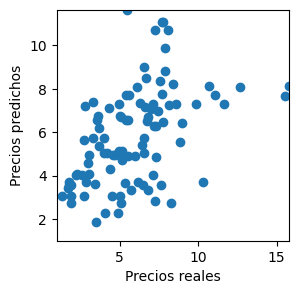

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(1,targets.max())
plt.ylim(1,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[ 3.  ,  3.  ,  4.  , 16.  ,  7.  , 18.  ,  0.7 ,  0.7 ,  0.2 ,
         3.  ,  4.  ,  1.  , 46.  ,  6.1 ],
       [ 6.  ,  4.  ,  1.  ,  6.  , 10.  , 20.  ,  0.3 ,  0.4 ,  0.5 ,
         2.  ,  2.  ,  3.  , 23.  ,  3.89],
       [ 4.  ,  7.  ,  4.  ,  8.  , 18.  ,  5.  ,  0.9 ,  0.8 ,  0.3 ,
         3.  ,  5.  ,  5.  , 46.  ,  3.23],
       [ 7.  ,  4.  ,  1.  , 15.  ,  7.  , 20.  ,  0.4 ,  0.8 ,  0.6 ,
         3.  ,  2.  ,  1.  , 55.  , 12.06],
       [ 6.  ,  5.  ,  8.  , 17.  , 12.  ,  7.  ,  0.6 ,  0.3 ,  0.3 ,
         4.  ,  3.  ,  2.  , 54.  ,  6.13],
       [ 7.  ,  2.  , 10.  ,  6.  ,  7.  , 16.  ,  0.2 ,  0.7 ,  0.6 ,
         3.  ,  5.  ,  4.  , 77.  ,  6.72],
       [ 4.  ,  8.  ,  9.  ,  6.  , 14.  , 10.  ,  0.9 ,  0.4 ,  0.6 ,
         4.  ,  1.  ,  5.  , 28.  ,  1.65],
       [ 1.  ,  9.  , 10.  ,  5.  , 12.  , 10.  ,  0.3 ,  0.7 ,  0.8 ,
         1.  ,  5.  ,  1.  , 58.  ,  3.59],
       [ 9.  ,  3.  ,  6.  ,  7.  , 17.  ,  8.  ,  0.2 ,  0.5 ,  0.2 ,
         

In [ ]:
cop = d_tree.predict([[2,	4,	4,	10,	5,	15,	0.3,	0.1,	0.2,	1	,1	,1	,25,	6.34]])

In [ ]:
cop

array([7.09])

# **Pedido 3**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="EOQ_area_max")
data

,articulo.1,articulo.2,articulo.3,D1,D2,D3,K1,K2,K3,h1,h2,h3,a1,a2,a3,A,pedido_1,pedido_2,pedido_3,area_total
0,1,2,3,2,4,4,10,5,15,0.3,0.1,0.2,1,1,1,25,6.34,7.09,11.57,24.999
1,1,2,3,3,2,9,11,16,9,0.4,0.7,0.7,5,4,3,65,4.45,4.59,8.12,64.956
2,1,2,3,3,3,4,16,7,18,0.7,0.7,0.2,3,4,1,46,6.10,3.62,13.20,45.993
3,1,2,3,9,10,3,8,19,7,0.4,0.6,0.4,5,5,5,72,4.58,7.34,2.47,71.962
4,1,2,3,8,4,7,17,13,16,0.3,0.2,0.3,4,2,4,74,7.90,6.83,7.17,73.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2,3,4,9,4,15,18,16,0.3,0.5,0.5,2,4,2,50,5.75,6.73,5.78,49.983
96,1,2,3,6,4,7,7,14,15,0.7,0.7,0.3,2,2,3,25,3.01,3.48,4.00,24.995
97,1,2,3,9,8,4,5,18,18,0.1,0.5,0.4,4,2,5,43,2.98,7.22,3.33,42.987
98,1,2,3,8,2,9,17,12,8,0.8,0.7,0.1,4,2,4,26,3.20,1.88,2.36,26.000


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D1",	"D2",	"D3",	"K1",	"K2",	"K3",	"h1",	"h2", "h3",	"a1",	"a2",	"a3",	"A","pedido_1","pedido_2"]])
targets = np.asarray(data["pedido_3"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

1.725

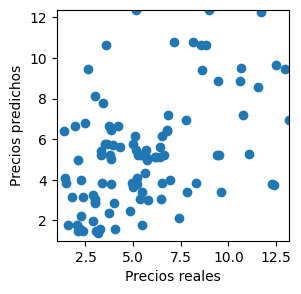

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(1,targets.max())
plt.ylim(1,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[ 9.  , 10.  ,  3.  ,  8.  , 19.  ,  7.  ,  0.4 ,  0.6 ,  0.4 ,
         5.  ,  5.  ,  5.  , 72.  ,  4.58,  7.34],
       [ 2.  ,  8.  ,  9.  , 13.  , 10.  ,  9.  ,  0.5 ,  0.8 ,  0.5 ,
         2.  ,  4.  ,  3.  , 72.  ,  6.12,  7.88],
       [ 8.  ,  2.  ,  1.  , 10.  , 19.  , 16.  ,  0.1 ,  0.7 ,  0.6 ,
         1.  ,  5.  ,  3.  , 71.  , 22.72,  6.59],
       [ 8.  ,  2.  ,  3.  , 17.  , 20.  , 17.  ,  0.4 ,  0.4 ,  0.8 ,
         3.  ,  4.  ,  5.  , 77.  , 10.61,  5.09],
       [10.  ,  9.  ,  6.  , 17.  , 14.  , 16.  ,  0.6 ,  0.5 ,  0.4 ,
         4.  ,  3.  ,  1.  , 65.  ,  7.78,  7.69],
       [ 1.  ,  4.  ,  9.  ,  8.  , 14.  ,  5.  ,  0.9 ,  0.7 ,  0.5 ,
         3.  ,  3.  ,  5.  , 35.  ,  1.68,  4.53],
       [ 4.  ,  8.  ,  7.  , 17.  , 10.  , 11.  ,  0.2 ,  0.8 ,  0.2 ,
         2.  ,  5.  ,  2.  , 63.  ,  8.44,  5.62],
       [ 7.  ,  8.  ,  9.  , 15.  , 12.  ,  5.  ,  0.2 ,  0.6 ,  0.8 ,
         3.  ,  2.  ,  4.  , 24.  ,  3.18,  3.66],
       [ 1.  ,  9.  , 10

In [ ]:
cop = d_tree.predict([[	2,	4,	4,	10,	5,	15,	0.3,	0.1,	0.2,	1,	1,	1,	25,	6.34,	7.09]])

In [ ]:
cop

array([11.57])

# **Area total**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="EOQ_area_max")
data

,articulo.1,articulo.2,articulo.3,D1,D2,D3,K1,K2,K3,h1,h2,h3,a1,a2,a3,A,pedido_1,pedido_2,pedido_3,area_total
0,1,2,3,2,4,4,10,5,15,0.3,0.1,0.2,1,1,1,25,6.34,7.09,11.57,24.999
1,1,2,3,3,2,9,11,16,9,0.4,0.7,0.7,5,4,3,65,4.45,4.59,8.12,64.956
2,1,2,3,3,3,4,16,7,18,0.7,0.7,0.2,3,4,1,46,6.10,3.62,13.20,45.993
3,1,2,3,9,10,3,8,19,7,0.4,0.6,0.4,5,5,5,72,4.58,7.34,2.47,71.962
4,1,2,3,8,4,7,17,13,16,0.3,0.2,0.3,4,2,4,74,7.90,6.83,7.17,73.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2,3,4,9,4,15,18,16,0.3,0.5,0.5,2,4,2,50,5.75,6.73,5.78,49.983
96,1,2,3,6,4,7,7,14,15,0.7,0.7,0.3,2,2,3,25,3.01,3.48,4.00,24.995
97,1,2,3,9,8,4,5,18,18,0.1,0.5,0.4,4,2,5,43,2.98,7.22,3.33,42.987
98,1,2,3,8,2,9,17,12,8,0.8,0.7,0.1,4,2,4,26,3.20,1.88,2.36,26.000


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D1",	"D2",	"D3",	"K1",	"K2",	"K3",	"h1",	"h2", "h3",	"a1",	"a2",	"a3",	"A","pedido_1","pedido_2","pedido_3"]])
targets = np.asarray(data["area_total"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

0.9924999999999962

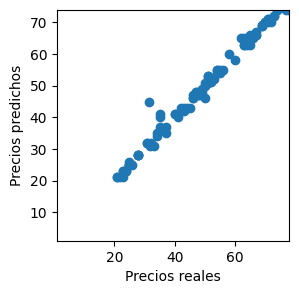

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(1,targets.max())
plt.ylim(1,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[ 2.  ,  4.  ,  4.  , 10.  ,  5.  , 15.  ,  0.3 ,  0.1 ,  0.2 ,
         1.  ,  1.  ,  1.  , 25.  ,  6.34,  7.09, 11.57],
       [ 3.  ,  2.  ,  9.  , 11.  , 16.  ,  9.  ,  0.4 ,  0.7 ,  0.7 ,
         5.  ,  4.  ,  3.  , 65.  ,  4.45,  4.59,  8.12],
       [ 8.  ,  2.  ,  3.  , 17.  , 20.  , 17.  ,  0.4 ,  0.4 ,  0.8 ,
         3.  ,  4.  ,  5.  , 77.  , 10.61,  5.09,  4.95],
       [ 1.  ,  9.  ,  1.  , 20.  , 15.  , 15.  ,  0.6 ,  0.7 ,  0.5 ,
         3.  ,  5.  ,  5.  , 34.  ,  2.05,  4.17,  1.4 ],
       [ 9.  ,  5.  ,  7.  ,  7.  , 19.  ,  9.  ,  0.4 ,  0.8 ,  0.1 ,
         3.  ,  5.  ,  2.  , 69.  ,  6.72,  6.3 ,  8.63],
       [ 7.  ,  4.  ,  1.  , 15.  ,  7.  , 20.  ,  0.4 ,  0.8 ,  0.6 ,
         3.  ,  2.  ,  1.  , 55.  , 12.06,  6.12,  6.5 ],
       [ 1.  ,  8.  ,  5.  ,  5.  ,  7.  , 20.  ,  0.8 ,  0.1 ,  0.8 ,
         2.  ,  4.  ,  5.  , 49.  ,  1.74,  4.7 ,  5.34],
       [ 7.  ,  8.  ,  9.  , 15.  , 12.  ,  5.  ,  0.2 ,  0.6 ,  0.8 ,
         3.  ,  2.  ,  4. 

In [ ]:
cop = d_tree.predict([[	2,	4,	4,	10,	5,	15,	0.3,	0.1,	0.2,	1,	1,	1,	25,	6.34,	7.09, 11.57]])

In [ ]:
cop

array([24.994])